Automatically created module for IPython interactive environment
#SVs is= [6 6]
#SVs is= [5 5]
#SVs is= [12 12]
#SVs is= [11 10]


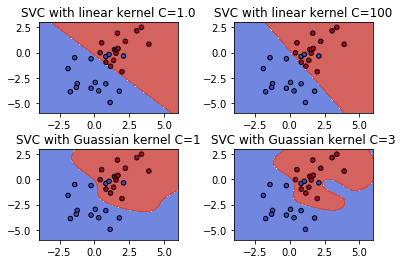

In [75]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



# import some data to play with
np.random.seed(3)
mean_1 = [ 2.0 , 0.2 ]
cov_1 = [ [ 1 , .5 ] , [ .5 , 2.0 ]]
mean_2 = [ 0.4 , -2.0 ]
cov_2 = [ [ 1.25 , -0.2 ] , [ -0.2, 1.75 ] ]
x_1 , y_1 = np.random.multivariate_normal( mean_1 , cov_1, 15).T
x_2 , y_2 = np.random.multivariate_normal( mean_2 , cov_2, 15).T
X = np.zeros((30,2))
X[0:15,0] = x_1
X[0:15,1] = y_1
X[15:,0] = x_2
X[15:,1] = y_2
y = np.zeros(30)
y[0:15] = np.ones(15)
y[15:] = -1 * np.ones(15)


# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C1 = 1.0  # SVM regularization parameter
C2 = 100
C3 = 3
models = (svm.SVC(kernel='linear', C=C1), 
          svm.SVC(kernel='linear', C=C2),
          svm.SVC(kernel='rbf',  C=C1),
          svm.SVC(kernel='rbf',  C=C3))

models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel C=1.0',
          'SVC with linear kernel C=100',
          'SVC with Guassian kernel C=1',
          'SVC with Guassian kernel C=3')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(np.array([-4,6]),np.array([-6,3]))

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(-4, 6)
    ax.set_ylim(-6, 3)
    #ax.set_xlabel('X_1')
    #ax.set_ylabel('X_2')
    ax.set_title(title)
    #print(clf.support_vectors_)
    #print(clf.support_)  
    print('#SVs is= '+str(clf.n_support_)) 
plt.show()